# Week 5: Lasso

The purpose of this week's exercises is to get our hands dirty using tools for high-dimensional estimation. We will here focus on the Lasso. However, most if not all exercises below can be done for the Ridge estimator, Dantzig selector, and the Elastic Net. (Do it!) We will use the "housing.csv" dataset, which contains data on house prices and more across districts in California. 

(The dataset is a slightly modified version of one initially featured in the paper "Sparse spatial autoregressions" by Pace and Barry in Statistics & Probability Letters 33.3 (1997), pp. 291-297. The data is from the 1990 census, so it will sadly not help you predict current house prices)

## Load and explore the dataset

In [1]:
# Read data
import pandas as pd
housing = pd.read_csv("housing.csv")
print("The number of rows and colums are {} and also called shape of the matrix".format(housing.shape)) # data dimensions
print("Columns names are \n {}".format(housing.columns))
print(housing.head()) # first observations
print(housing.tail()) # last observations
print(housing.dtypes) # data types
housing.isnull().sum() # check for missing values

The number of rows and colums are (20640, 10) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

In [3]:
housing.iloc[:, :-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [4]:
imp = IterativeImputer(max_iter=10, random_state=1337)
all_data_array = np.array(housing.iloc[:, :-1])
imp.fit(all_data_array)

IterativeImputer(random_state=1337)

In [5]:
sum(np.isnan(all_data_array))

array([  0,   0,   0,   0, 207,   0,   0,   0,   0])

In [6]:
X_test = np.array(housing.iloc[:, :-1])

### Trying to impute

In [7]:
imp_out = np.round(imp.transform(X_test))
sum(np.isnan(imp_out))

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

Some observations are missing a bedroom count. We here drop those. (An alternative approach is to impute the mean or median value and use all observations. Do it!)

In [8]:
housing=housing.dropna()
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Assign variables

We will model house prices (median_house_value) using a linear (in the parameters) model of the remaining basic regressors minus "ocean_proximity". (The latter variable is likely a predictor of house prices. However, due to its categorical nature, we will exclude it for the purpose of this exercise. A better  approach is to convert this categorical variable into a collection of dummies.)

In [9]:
y = housing.median_house_value
X = housing.drop(["median_house_value","ocean_proximity"],axis=1)
print(X.head()) # first regressor observations

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462  


# Exercises


### Question 1: Standardization
Standardize the candidate regressors to bring everything onto the same scale. 

In [10]:
# One way is to use the functions mean() and std() from numpy
import numpy as np

def standardize(X):
    X_tilde = (X-X.mean())/X.std()
    return X_tilde

X_tilde=standardize(X)

### Question 2: Penalty Grid
Construct a grid of candidate penalty levels from 1 to 80000, and estimate the linear model for each of these penalty levels while saving the coefficient estimates.
[Hints: sklearn.linear_model.Lasso and numpy.geomspace may come in handy.]

In [11]:
# Create a grid using numpy.geomspace
penalty_grid= np.geomspace(1,80000, endpoint=True)

from sklearn.linear_model import Lasso


$$
\left(\widehat{\beta}_0(\lambda), \widehat{\beta}(\lambda)\right) \in \underset{\left(b_0, b\right) \in \mathbf{R}^{1+p}}{\operatorname{argmin}}\left\{\frac{1}{2 n} \sum_{i=1}^n\left(Y_i-b_0-X_i^{\prime} b\right)^2+\lambda \sum_{j=1}^p\left|b_j\right|\right\}
$$

In [12]:
# Estimate the model with lasso for a given penalty level using sklearn.linear_model.Lasso - remember to specify alpha otherwise it will not run
# Here you should be aware of the functions fit() and coef_() in sklearn.linear_model.Lasso
# Save the estimated coefficients for later
# Estimate the linear model over the grid using a loop

coefs = []          # empty list for coefs
intercepts = []     # empty list for intercepts

for i in penalty_grid:
    clf = Lasso(alpha=i)
    clf.fit(X_tilde, y)
    coefs.append(clf.coef_)
    intercepts.append(clf.intercept_)

### Question 3: Lasso Path

Plot the (standardized) coefficient estimates as a function of the penalty level, i.e.
create what is known as the Lasso path. [Hints: One option is matplotlib.pyplot, which also allows you to specify a logarithmic first axis using set_xscale('log').]

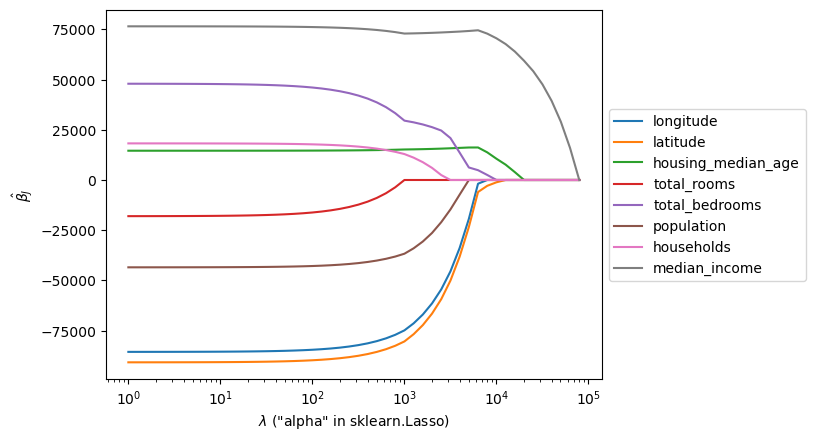

In [13]:
# Use matplotlib.pyplot
# Try to change the x axis to log - useful function gca() and set_xscale('log') from matplotlib.pyplot
labels = list(housing.drop(["median_house_value","ocean_proximity"],axis=1).columns)

import matplotlib.pyplot as plt


ax=plt.gca()
plt.plot(penalty_grid, coefs, label=labels)
ax.set_xscale('log')
ax.set_ylabel(r'$\hat{\beta_J}$')
ax.set_xlabel('$\lambda$ ("alpha" in sklearn.Lasso)')
ax.legend(bbox_to_anchor=(1, 0.75))
plt.show() 

# If time permits try to make the plot nice - Add labels to the axis, title, legends 

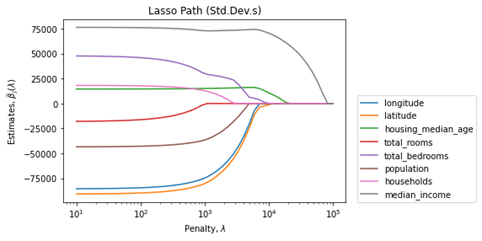

In [14]:
# You should get something that looks like this...
from IPython import display
display.Image("./Lasso path.png")

### Question 4: Cross Validation - penalty $\lambda$
Compute the penalty level and estimates implied by 5-fold cross-validation (5-CV). Which variables are selected by 5-CV? [Hint: Use sklearn.linear_model.LassoCV.] Consider the path of mean squared errors for different penalty levels.

In [15]:
# Use sklearn.linear_model.LassoCV and remember the functions fit(), alpha_ and coef_ 
# Save the estimated coefficients for later

from sklearn.linear_model import LassoCV

clf_cv = LassoCV(cv=5)

clf_cv.fit(X_tilde, y)
coeff_CV=clf_cv.coef_
penalty_CV=clf_cv.alpha_

print("lambda_CV =",penalty_CV.round(2))


lambda_CV = 79.46


C:\Users\JBH\AppData\Local\Temp\ipykernel_16596\3478475076.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin=0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


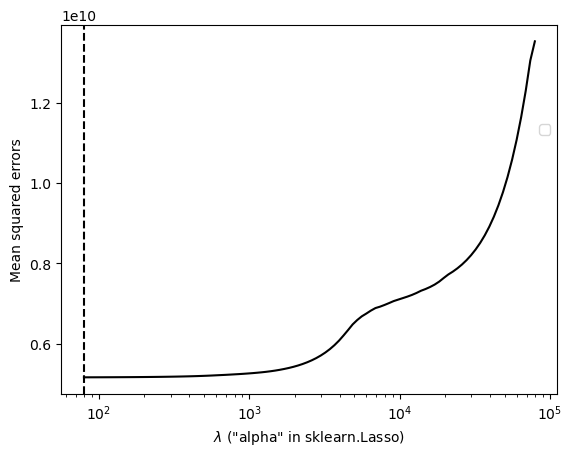

In [16]:
ax=plt.gca()
plt.plot(clf_cv.alphas_, clf_cv.mse_path_.mean(axis=-1), 'k')
plt.axvline(clf_cv.alpha_, linestyle='--', color='k')
ax.set_xscale('log')
ax.set_xlim(xmin=0)
ax.set_xlabel(r'$\lambda$ ("alpha" in sklearn.Lasso)')
ax.set_ylabel(r'Mean squared errors')
ax.legend(bbox_to_anchor=(1, 0.75))
plt.show() 

You should get lambda_CV = 79.46

chosen lambda by CV: 0.001
Minimal possible lambda by CV: 0.001


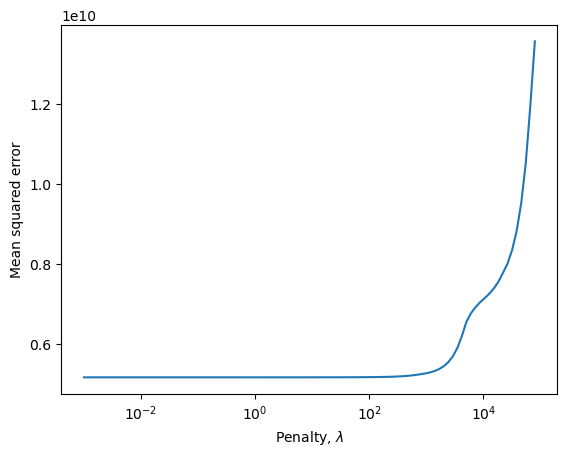

In [17]:
n = 100
L = np.geomspace(0.001,80000,n)
fit_cv1 = LassoCV(cv=5, alphas=L).fit(X_tilde,y)
lambda1_CV = fit_cv1.alpha_
print("chosen lambda by CV:", fit_cv1.alpha_)
print("Minimal possible lambda by CV:", np.min(fit_cv1.alphas_))

# Plot the error path 
ax = plt.gca()
ax.plot(fit_cv1.alphas_, np.mean(fit_cv1.mse_path_, axis=1)) 
ax.set_xscale('log')
plt.xlabel('Penalty, $\lambda$')
plt.ylabel('Mean squared error')
plt.show()

**What does this error path suggest about the relationship between model sparsity and predictive power?**

Very low penalty, almost zero.

Sparsity is inversely related to $\lambda$, thus with a very low penalty parameter, only a few coefficients are 'shut down'.

### Question 5: Cross Validation - estimates $\hat{\boldsymbol{\beta}}$
Visualize the estimates resulting from 5-CV by adding a vertical line
to your Lasso path at the corresponding penalty level. [Hint: Use axvline.]

C:\Users\JBH\AppData\Local\Temp\ipykernel_16596\4102873847.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin=0)


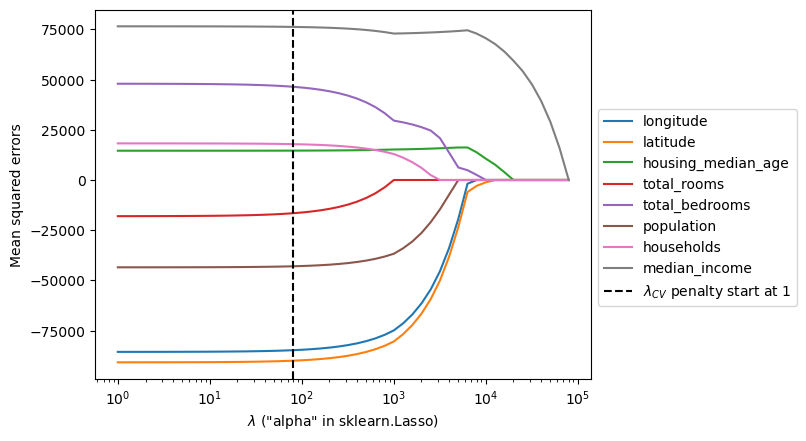

In [18]:
# Reuse the former plot and use the function axvline()
plt.plot(penalty_grid,coefs, label=labels)
#plt.xscale('log')

ax=plt.gca()
#plt.plot(fit_cv1.alphas_, fit_cv1.mse_path_.mean(axis=-1), 'k')
plt.axvline(clf_cv.alpha_, linestyle='--', color='k', label=r'$\lambda_{CV}$ penalty start at 1')               
ax.set_xscale('log')
ax.set_xlim(xmin=0)
ax.set_xlabel(r'$\lambda$ ("alpha" in sklearn.Lasso)')
ax.set_ylabel(r'Mean squared errors')
ax.legend(bbox_to_anchor=(1, 0.75))
plt.show() 

### Question 6: BRT penalty $\lambda$
Compute the (feasible) Bickel-Ritov-Tsybakov (BRT) penalty level, the resulting Lasso estimates, and visualize them in your path. Compare the BRT results to the CV
ones. [Hint: scipy.stats.norm.ppf gives you the inverse of the normal CDF.] 

\begin{align}
    \hat{\lambda}^{B R T}   &=\frac{2 c \sigma}{\sqrt{N}} \Phi^{-1}\left(1-\frac{\alpha}{2 p}\right) \sqrt{\max _{1 \leq j \leq p} \frac{1}{N} \sum_{i=1}^N \mathbf{X}_i^2} \Leftrightarrow \\

    \hat{\lambda}^{B R T}   &=\frac{2 c \sigma}{\sqrt{N}} \Phi^{-1}\left(1-\frac{\alpha}{2 p}\right)
\end{align}

The last term = 1 only happens, if standardize $\mathbf{X}_i$.

In [129]:
# Hard code BRT up - remember the data has been standardized, this has an easy implication for the max-sum
# Save the estimated coefficients for later
# Remember to divide by 2 due to Python definition of Lasso
from cv2 import sqrt
from scipy.stats import norm
from numpy import linalg as la

sigma = np.std(y)
(N,p) = X_tilde.shape
c = 1.1
alpha = 0.05
#lambda_brt = c*sigma*norm.ppf(1-alpha/(2*p))/np.sqrt(n) 
# Note: Have divided by 2 due to Python definition of Lasso

penalty_BRT= ((2*c*sigma)/np.sqrt(N))*(norm.ppf(1-alpha/(2*p)))

clf_BRT = Lasso(alpha=penalty_BRT/2)

clf_BRT.fit(X_tilde, y)
coeff_BRT =clf_BRT.coef_

print("lambda_BRT =",(penalty_BRT/2).round(2))


lambda_BRT = 2428.92


You should get lambda_BRT = 2428.92


C:\Users\JBH\AppData\Local\Temp\ipykernel_16596\3184964739.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin=0)


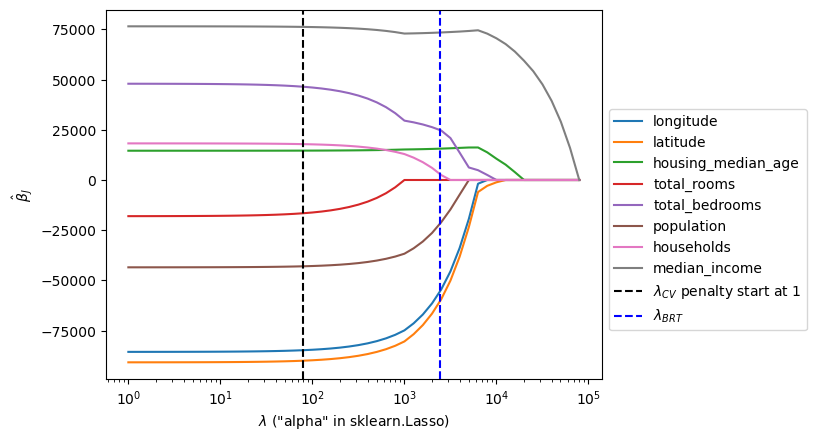

In [130]:
plt.plot(penalty_grid,coefs, label=labels)
#plt.xscale('log')

ax=plt.gca()
plt.axvline(clf_cv.alpha_, linestyle='--', color='k', label=r'$\lambda_{CV}$ penalty start at 1')    
plt.axvline(clf_BRT.alpha, linestyle='--', color='b', label=r'$\lambda_{BRT}$')               
ax.set_xscale('log')
ax.set_xlim(xmin=0)
ax.set_xlabel(r'$\lambda$ ("alpha" in sklearn.Lasso)')
ax.set_ylabel(r'$\hat{\beta}_J$')
ax.legend(bbox_to_anchor=(1, 0.75))
plt.show() 

### Question 7: BCCH penalty $\lambda$
Compute the Belloni-Chen-Chernozhukov-Hansen (BCCH) pilot and updated penalty levels, the resulting Lasso estimates, and add them to your path. Compare
the BCCH penalty and estimates to both the CV and BRT ones.

$$
\hat{\lambda}^{\text {pilot }}=\frac{2 c}{\sqrt{N}} \Phi^{-1}\left(1-\frac{\alpha}{2 p}\right) \sqrt{\max _{1 \leq j \leq p} \frac{1}{N} \sum_{i=1}^N\left(Y_i-\bar{Y}\right)^2 \mathbf{X}_i^2}
$$

Then,

$$
\hat{\lambda}^{B C C H}=\frac{2 c}{\sqrt{N}} \Phi^{-1}\left(1-\frac{\alpha}{2 p}\right) \sqrt{\max _{1 \leq j \leq p} \frac{1}{N} \sum_{i=1}^N \hat{\epsilon}_i \mathbf{X}_i^2}
$$

In [107]:
# Calculate the pilot estimate with a and c as in BRT
# Here the max sum is not as simple as in BRT
# Remember to divide by 2 due to Python definition of Lasso

yXscale = np.sqrt(np.max((1/n*(y-np.mean(y))**2)@X_tilde**2))

penalty_pilot =  ((2*c*norm.ppf(1-alpha/(2*p)))/np.sqrt(N)) * yXscale

clf_pilot = Lasso(alpha=penalty_pilot/2)

fit_pilot= clf_pilot.fit(X_tilde,y)
coeff_pilot =  clf_pilot.coef_

print("lambda_pilot =",(penalty_pilot/2).round(2))


lambda_pilot = 4254.79


Your should get lambda_pilot = 4254.89

**Obtaining residuals from the pilot reg**

$$
\hat{\epsilon}_i=\underbrace{Y_i}_{\text{Our observations}}-\underbrace{\mathbf{X}_i \hat{\boldsymbol{\beta}}^{\text {pilot }}}_{\text{Our predictions}}
$$



Then,

$$
\hat{\lambda}^{B C C H}=\frac{2 c}{\sqrt{N}} \Phi^{-1}\left(1-\frac{\alpha}{2 p}\right) \sqrt{\max _{1 \leq j \leq p} \frac{1}{N} \sum_{i=1}^N \hat{\epsilon}_i^2 \mathbf{X}_i^2}
$$

In [127]:
# Calculate residuals and declare the updated penalty: 
# Remember to divide by 2 due to Python definition of Lasso
preds = clf_pilot.predict(X_tilde)

eps =  y-preds
epsXscale = np.sqrt(np.max(1/n*(eps**2@X_tilde**2)))
epsXscale

penalty_BCCH =  ((2*c*norm.ppf(1-alpha/(2*p)))/np.sqrt(N)) * epsXscale

print("lambda_BCCH =",(penalty_BCCH/2).round(2))

lambda_BCCH = 1866.45


You should get lambda_BCCH = 1866.5

C:\Users\JBH\AppData\Local\Temp\ipykernel_16596\4008185440.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin=0)


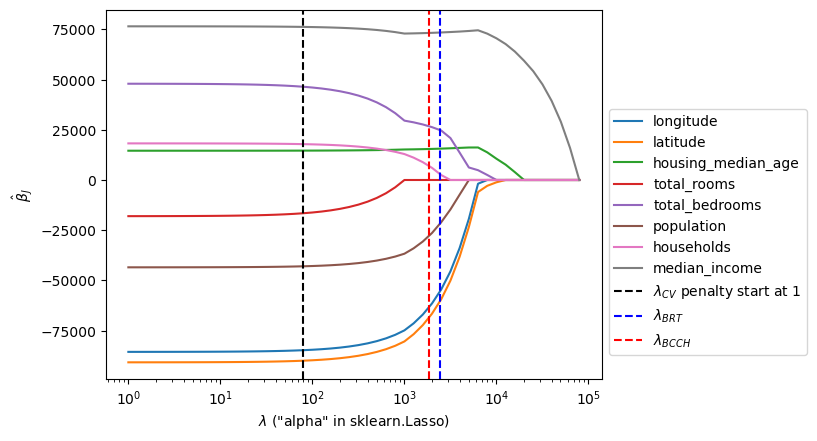

In [131]:
# Calculate updated estimates using the updated penalty

clf_BCCH = Lasso(alpha=penalty_BCCH/2)
clf_BCCH.fit(X_tilde,y)
coeff_BCCH =  clf_BCCH.coef_


# Visualise in former plot
plt.plot(penalty_grid,coefs, label=labels)
#plt.xscale('log')

ax=plt.gca()
plt.axvline(clf_cv.alpha_, linestyle='--', color='k', label=r'$\lambda_{CV}$ penalty start at 1')    
plt.axvline(clf_BRT.alpha, linestyle='--', color='b', label=r'$\lambda_{BRT}$')  
plt.axvline(clf_BCCH.alpha, linestyle='--', color='r', label=r'$\lambda_{BCCH}$')               
ax.set_xscale('log')
ax.set_xlim(xmin=0)
ax.set_xlabel(r'$\lambda$ ("alpha" in sklearn.Lasso)')
ax.set_ylabel(r'$\hat{\beta}_J$')
ax.legend(bbox_to_anchor=(1, 0.75))
plt.show() 

### Question 8: Summary of estimates $\hat{\boldsymbol{\beta}}$
Gather the estimates in a table.


In [211]:
results = dict(zip(['CV', 'BRT', 'BCCH'],[coeff_CV,coeff_BRT,coeff_BCCH]))

In [212]:
results

{'CV': array([-84768.3942305 , -89997.74773566,  14628.61875273, -16565.82374767,
         46444.9567303 , -42980.40518077,  17859.02986154,  76242.66842645]),
 'BRT': array([-55773.03712795, -60677.24617492,  15594.67025044,     -0.        ,
         24937.21854932, -21994.0949594 ,   3114.83754277,  73440.07014394]),
 'BCCH': array([-63320.26551365, -68465.65944245,  15438.15869039,     -0.        ,
         26765.57528695, -27804.45587513,   6979.95048596,  73238.28330255])}

In [214]:
# One way is to create a dict and DataFrame from Pandas..

df_res=pd.DataFrame(results, index=labels)
df_res

,CV,BRT,BCCH
longitude,-84768.394230,-55773.037128,-63320.265514
latitude,-89997.747736,-60677.246175,-68465.659442
housing_median_age,14628.618753,15594.670250,15438.158690
total_rooms,-16565.823748,-0.000000,-0.000000
total_bedrooms,46444.956730,24937.218549,26765.575287
population,-42980.405181,-21994.094959,-27804.455875
households,17859.029862,3114.837543,6979.950486
median_income,76242.668426,73440.070144,73238.283303


You should get something that looks like this...

| | CV | BRT | BCCH | 
|-|-|-|-|
| longitude	| -84766 | -55772 |	-63318 |
| latitude	| -89995 | -60676 | -68463 |
| housing_median_age | 14628 | 15594 | 15437 |
| total_rooms | -16565 | 0 |0 |
| total_bedrooms |	46443 |	24936 | 26764 |
| population |	-42979 | -21994 | -27803 |
| households |	17858 |	3115 | 6979 |
| median_income	| 76240 | 73438 | 73236 |


### Question 9 (Optional) 
Redo the entire exercise after having added squares of the basic regressors. Note that creating the Lasso path may take a while and the algorithm may fail to converge at low penalty levels. If so, try to change the number of iterations by adjusting max_iter. [Hints: Create squares and use numpy.hstack to add them to the regressors in levels. You may also use sklearn.preprocessing.PolynomialFeatures to further add interaction terms.]

In [ ]:
import numpy as np
Xtech = np.hstack((X,X ** 2))
Xtech_tilde= # fill in

In [ ]:
fitCV2 = # fill in

In [ ]:
n = 100
L = np.geomspace(0.001,80000,n)
fit_cv2 = LassoCV(cv=5, alphas=L).fit(Xtech_tilde,y)
lambda2_CV = fit_cv2.alpha_
print("chosen lambda by CV:", fit_cv2.alpha_)
print("Minimal possible lambda by CV:", np.min(fit_cv2.alphas_))

#error path 
ax = plt.gca()
ax.plot(fit_cv2.alphas_, np.mean(fit_cv2.mse_path_, axis=1)) 
ax.set_xscale('log')
plt.xlabel('Penalty, $\lambda$')
plt.ylabel('Mean squared error')
plt.show()

Compare your error path to the one you obtained in Question 4 - has the tradeoff between model sparsity and predictive power changed?